Alumno: Gerardo de Miguel González

1.- Generar una muestra de tamaño N = 10000 correspondiente a la altura de personas adultas, asumiendo que su densidad de probabilidad es una función normal/gaussiana con μ= 1.78m y σ= 0.1 m. Dibuja la densidad de frecuencia y la densidad de probabilidad por separado. Compara μ y σ con la media muestral y la varianza muestral. 

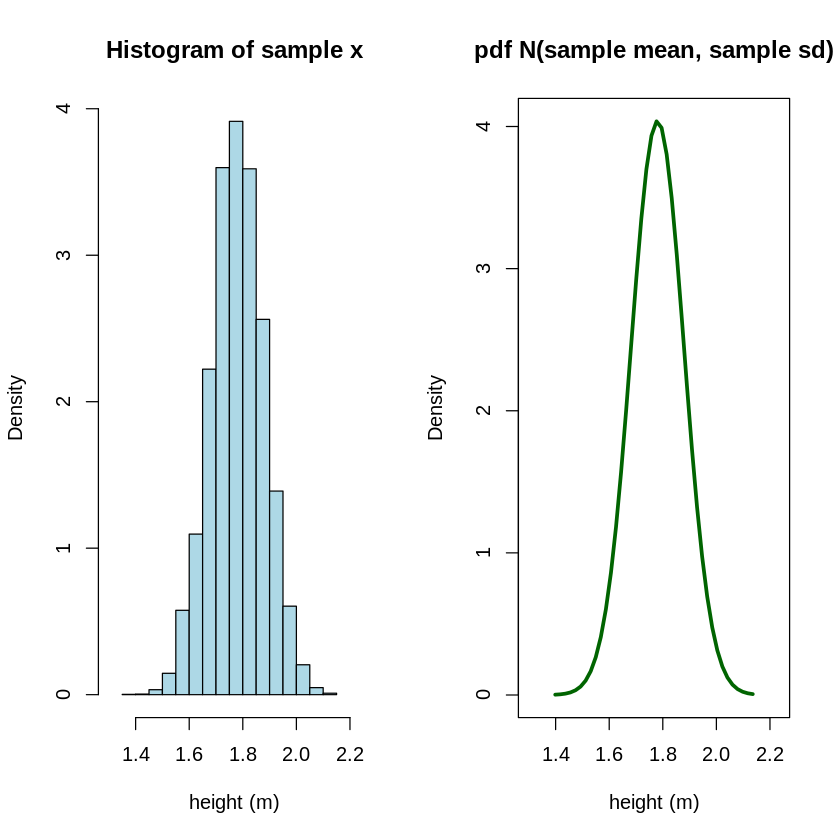

In [50]:
set.seed(3000)
mu <- 1.78
sigma <- 0.1
#::GMG::Generamos la muestra del tamaño indicado
deviates <- rnorm(n = 10000,mean = mu,sd = sigma)

#::GMG::Ponemos una matriz de 1x2 para poner las gráficas enparejadas horizontalmente
par(mfrow=c(1,2))
#::GMG::Graficamos el histograma de densidad de la muestra
h <- hist(x = deviates,
     freq = FALSE, 
     breaks = "Sturges",
     main = 'Histogram of sample x',
     col="lightblue",
     xlab='height (m)',
     xlim=c(min(x) - 0.1, max(x) + 0.1))

#::GMG::Calculamos la distribución normal con media y desviación típica muestral
#       sobre una secuencia con el mismo rango que la muestra generada
xseq <- seq(min(deviates),max(deviates),length=40)
densities<-dnorm(xseq, mean(deviates),sd(deviates))

#::GMG::Graficamos la distribución normal
plot(xseq, 
     densities, 
     col="darkgreen",
     xlab="height (m)", ylab="Density", 
     type="l",lwd=3, 
     main="pdf N(sample mean, sample sd)",
     xlim=c(min(deviates) - 0.1, max(deviates) + 0.1))

In [39]:
#::GMG::Para especificar los decimales que se visualizan del estadístico
specify_decimal <- function(x, k) trimws(format(round(x, k), nsmall=k))
paste('A size',length(x),'sample',' with sample mean:', specify_decimal(mean(x),5),
      'and sample variance:',specify_decimal(var(x),5),
      'and sample std dev.:',specify_decimal(sd(x),5))
paste('The distribution mean:',mu,
      'and the distribution variance:',sigma**2,
      'and finally, the istribution std. dev.:',sigma)

#::GMG::Vemos el objeto histograma generado por R 
#       del que hemos dibujado $density al poner Freq = FALSE
h

$breaks
 [1] 1.35 1.40 1.45 1.50 1.55 1.60 1.65 1.70 1.75 1.80 1.85 1.90 1.95 2.00 2.05
[16] 2.10 2.15

$counts
 [1]    1    2   17   73  288  548 1111 1799 1957 1795 1281  695  302  102   24
[16]    5

$density
 [1] 0.002 0.004 0.034 0.146 0.576 1.096 2.222 3.598 3.914 3.590 2.562 1.390
[13] 0.604 0.204 0.048 0.010

$mids
 [1] 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775 1.825 1.875 1.925
[13] 1.975 2.025 2.075 2.125

$xname
[1] "deviates"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

2.- Considerar la distribución de probabilidad anterior y la media muestral para una muestra de tamaño N (TN). Generar un número alto M = 10000 de muestras y estudiar la distribución (μ-TN), para N = 10, 100, 1000, 10000, 100000. Calcular el valor esperado en cada caso (considerando el valor esperado como el promedio a los M = 10000 psuedo-experimentos) y dibujar el resultado en función de N. Repetir el mismo procedimiento usando la varianza (considerando de nuevo las las M = 10000 pseudo-muestras).

In [58]:
#::GMG::Función para generar M muestras de tamaño T.n dispuestos en una matriz de MxT.n
muestras <- function(T.n = 10, M = 10000, m = 1.78, ds = 0.1) {
    return (matrix(data = rnorm(M*T.n,m,ds), 
                   nrow = M, 
                   ncol = T.n, 
                   byrow = TRUE)
           )
}


In [63]:
#::GMG::Generamos los diferentes "experimentos"
T.10 = muestras(T.n = 10, M = 1)
T.100 = muestras(T.n = 100, M = 1)
T.1000 = muestras(T.n = 1000, M = 1)
#T.10000 = muestras(10000)
#T.100000 = muestras(100000)

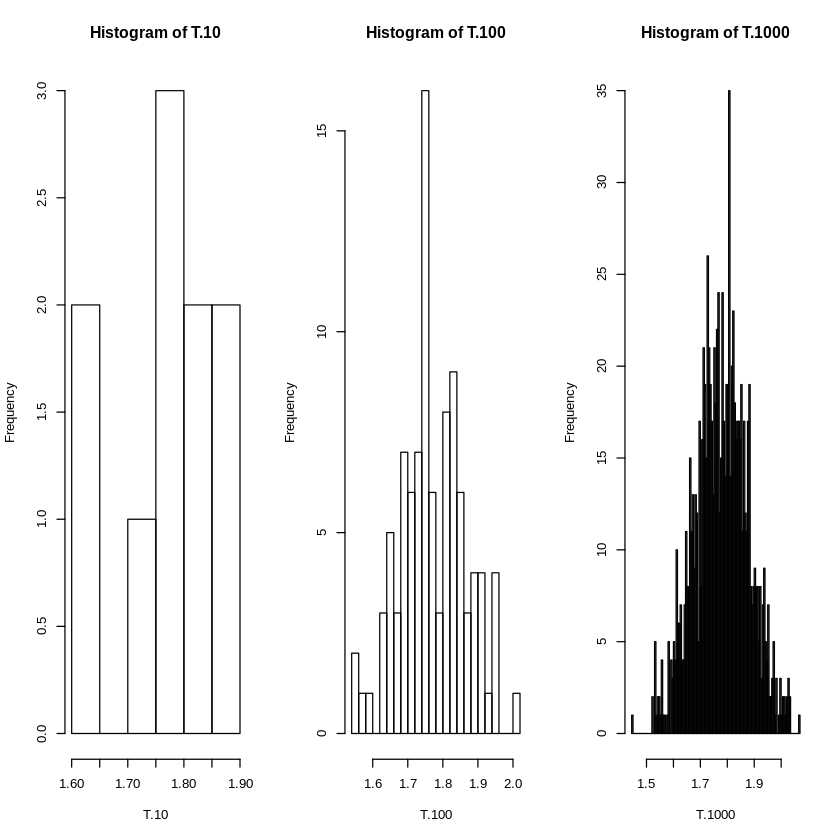

In [64]:
#http://seankross.com/notes/dpqr/
#par(mfrow=c(1,3))
#hist(T.10, breaks = 5,)
#hist(T.100, breaks = 20)
#hist(T.1000, breaks = 100)

NOTAS

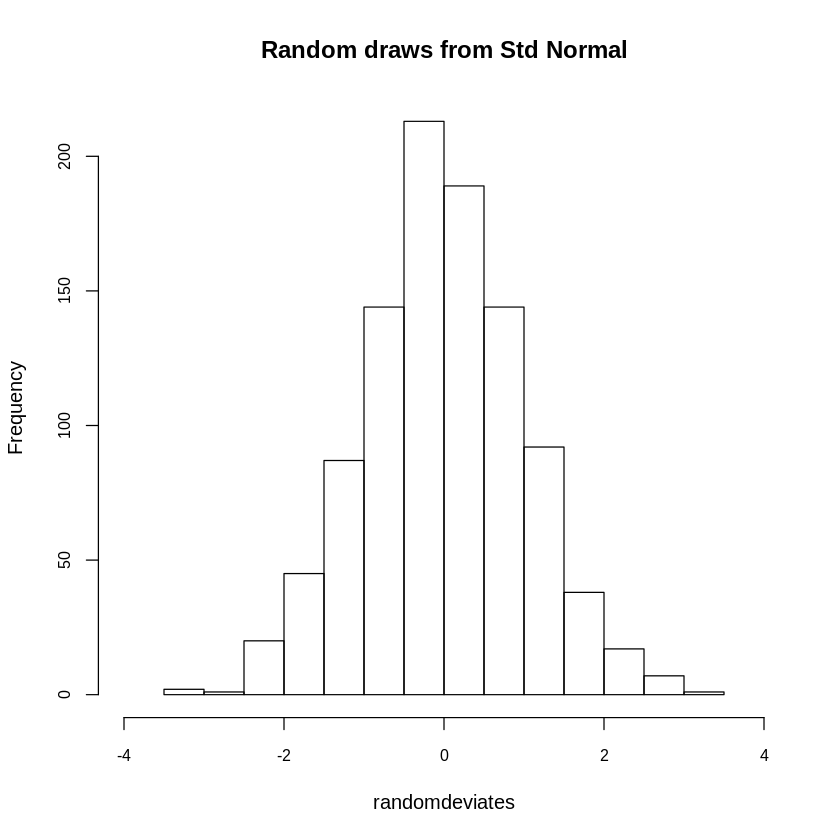

In [15]:
#::GMG::Notas
randomdeviates<-rnorm(1000,0,1)
hist(randomdeviates, main="Random draws from Std Normal", cex.axis=.8, xlim=c(-4,4))

In [55]:
m1<-matrix(rnorm(6),2,3)
m1

-0.0423644,0.7401660,-0.7697154
-1.2238582,-0.1217885,1.2495018


In [56]:
m2<-replicate(3, rnorm(2))
m2

0.7906875,-0.5800013,-0.8777586
0.3165321,0.7367999,-1.2639561


In [57]:
# Create Multivariate Matrices
# Random Multivariate Matrix
# 5 variables, 10 samples, 1 standard devation, 0.2 noise factor
#https://www.rdocumentation.org/packages/OmicsMarkeR/versions/1.4.2/topics/create.random.matrix
rand.mat <- create.random.matrix(nvar = 5, 
                                 nsamp = 10, 
                                 st.dev = 1, 
                                 perturb = 0.2)
rand.mat

ERROR: Error in create.random.matrix(nvar = 5, nsamp = 10, st.dev = 1, perturb = 0.2): could not find function "create.random.matrix"


In [ ]:
#https://stackoverflow.com/questions/42488191/r-1000-rnorm-samples
#
#X <- matrix(rnorm(25000), 1000, 25) 
#
#Each row of X is a sample of size 25 from the standard normal distribution. There are 1000 rows.
#@MattJ if you would like to sample one row randomly from X you can do: X[sample(x = 1000, size = 1), ]